# Hypothesis Testing

From lecture, we know that hypothesis testing is a critical tool in determing what the value of a parameter could be.

We know that the basis of our testing has two attributes:

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**

The tests we have discussed in lecture are:

* One Population Proportion
* Difference in Population Proportions
* One Population Mean
* Difference in Population Means

In this tutorial, I will introduce some functions that are extremely useful when calculating a t-statistic and p-value for a hypothesis test.

Let's quickly review the following ways to calculate a test statistic for the tests listed above.

The equation is:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$ 

We will use the examples from our lectures and use python functions to streamline our tests.

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

### One Population Proportion

#### Research Question 

In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

1018 Parents

56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [17]:
# One tail type test
n = 1018 # total parents
pnull = .52 # null hypothesis / previous observed percentage
phat = .56 # Observed Value (See "Survey Results" Notes Section for Course Single Proportion Section)
sm.stats.proportions_ztest(count=phat * n, nobs=n, value=pnull, alternative='larger', prop_var=0.52)
# (count = number of successes in trial or (percentage * observations), nobs = number of trials in observation,
#  value = value of null hypothesis, alternative = alternative hypothesis, prop_var = common use case for null proportion observed value)
## Return is the zstat and p-value)

(2.5545334262132955, 0.005316510991822442)

In [14]:
# Manual Calculation for test statistic (one-sided "Z") == phat(observed) - pnull(null prop) / se
standard_error_estimate = np.sqrt(pnull * (1 - pnull) / n)
standard_error_estimate # rounded and it matches our value in 

0.015658436718635507

In [15]:
# ZTest equation (phat - pnull / standard_error_estimate) (we'll round to 4 to see if we get same lecture value)
Z_test_manual = (phat - pnull) / round(standard_error_estimate, 4)
Z_test_manual # That matches our 2.55 should we round!

2.547770700636945

#### Z-Test Summary
* Interpreting it, we could say this Z test statistic means that our observed sample proportion is, 2.555 null standard errors above our hypothesized population proportion, and so we took our sample, we subtracted out the hypothesis, and then divided by the standard error, so we get the number of null standard errors.
* Our small p-value (lower than a 95% confidence of 0.05 and 99% confidence of 0.01) gives us a great indication here that our observed proportion value of p=.52 can be rejected for a higher value

### Difference in Population Proportions

#### Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  
**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0  


91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.

120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

In [20]:
# This example implements the analysis from the "Difference in Two Proportions" lecture videos

# Sample sizes
n1 = 247 
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1, 2)
p2 = round(y2 / n2, 2)

# Estimate of the combined population proportion
phat = (y1 + y2) / (n1 + n2) # (91 + 120) / (247 + 308) == 211/555 == .38

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat) # 0.2356432107783459

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * ((1 / n1) + (1 / n2)))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))

# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))

print("\nP-Value")
print(round(pvalue, 2))

Test Statistic
-0.48

P-Value
0.63


#### Test Interpretation
* Our z is negative 0.48, and so that means that our observed difference in sample proportions is 0.48 estimated standard errors below our hypothesized mean of equal population proportions.
* Because we have a z-test statistic, that will be distributed according to a standard normal distribution. 
* In this case, we conclude that there is no significant difference between the population proportion of parents of Black and Hispanic children who report their child has had swimming lessons. based on our alpha of .1
* A two-sided hypotheses of non-equal proportions would have us shade all the distance to the left and right of .48 standard deviations of our our hypothesized equal mean
    * With that in mind, we would see that our distribution or two-sided alternative hypotheses would theoretically live within a good chunk of our null hypothesis distribution
* Thus our high p-value does not provide evidence to reject the null hypothesis 

### One Population Mean

#### Research Question 

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.
**Null Hypothesis:** $\mu$ = 80
**Alternative Hypthosis:** $\mu$ > 80

25 Adults

$\mu = 82.46$

$\sigma = 15.06$

In [21]:
df = pd.read_csv("../DataFiles/Cartwheeldata.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [22]:
n = len(df)
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
(n, mean, sd)

(25, 82.48, 15.058552387264855)

In [24]:
stand_err_one_pop_mean = sd / np.sqrt(n)
stand_err_one_pop_mean = round(stand_err_one_pop_mean, 3)
stand_err_one_pop_mean

3.012

In [25]:
# best estimate (observed mean) - null hypothesis value  / standard error
test_stat_one_mean = (mean - 80) / stand_err_one_pop_mean
test_stat_one_mean

0.8233731739707848

* Our test statistic, our t statistic turned out to be 0.82.
* Our sample mean (82.48) is only 0.82 (estimated) standard errors above null value of 80 inches as out t stat shows above
    * Not even one estimated standard error above the hypothesized value, that's not that different from that 80 inches.

* P-value = Probability of seeing test statistic of 0.82 or more extreme assuming the null hypothesis is true
    * Since we have one-tailed test to the right (greather than alternative)

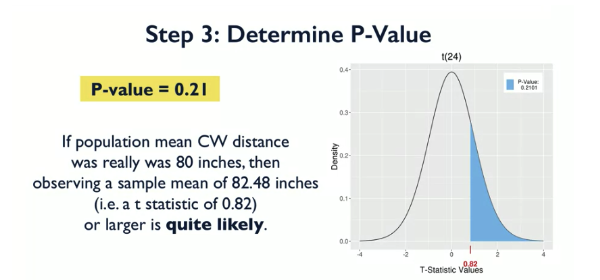

* If the P-value turned out to be small less than or equal to the significance level, saying that our data was more unusual than what we required it to be under h naught to convince us to reject it, we'll then we'd reject h naught but here our P-value is quite large. 
* Our conclusion might be written that based on our estimated sample mean of 82.48 inches, we're not able to support the theory that the population mean cart will distance is greater than 80 inches. Not enough evidence to reject the null in favor of that alternative theory.

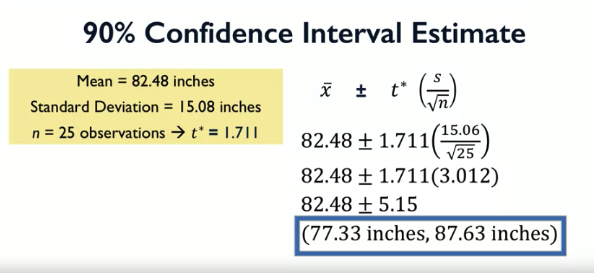

In [26]:
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html
# In the one sample case, value is the mean of x1 under the Null hypothesis. 
# In the two sample case, value is the difference between mean of x1 and mean of x2 under the Null hypothesis. 
    # The test statistic is x1_mean - x2_mean - value.

(0.8234523266982029, 0.20512540845395266)

### Difference in Population Means

#### Research Question 

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [27]:
url = "../DataFiles/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [40]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [41]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [42]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

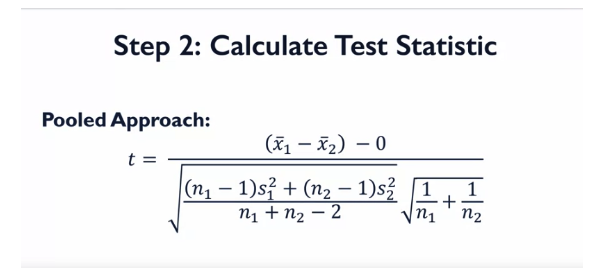

In [51]:
# Pooled approach with variance of two populations are assumed to be equal
denominator_1 = np.sqrt(((n1 - 1) * (sd1 ** 2) + ((n2 - 1) * (sd2 ** 2))) / ((n1 + n2) - 2))
denominator_2 = np.sqrt((1/n1) + (1/n2))
two_mean_test_stat = (mu1 - mu2) / (denominator_1 * denominator_2)
two_mean_test_stat

6.217136917798761

In [53]:
#print(1/(6.59154431126401 ** 10)) # P value here is insanely low (below any significance level allowing us to reject the null)
sm.stats.ztest(females["BMXBMI"].dropna().tolist(), male["BMXBMI"].dropna().tolist())

6.458449090863146e-09


(6.1755933531383205, 6.591544431126401e-10)

* Similarly we can pass just two sets of values to the same method above for a tstat and pvalue which are the two outputs just like above
